# **Logistic Regression for Social Ads Network Data**

## **Importing Libraries**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## **Importing Dataset**

In [71]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data Transformation

In [45]:
gender_mapping = {'Female': 0, 'Male': 1}
data['Gender'] = data['Gender'].map(gender_mapping)

In [46]:
scaler = MinMaxScaler()
data['EstimatedSalary'] = scaler.fit_transform(data[['EstimatedSalary']])

In [47]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,0.029630,0
1,15810944,1,35,0.037037,0
2,15668575,0,26,0.207407,0
3,15603246,0,27,0.311111,0
4,15804002,1,19,0.451852,0


## **Exploratory Data Analysis**

### Checking for NULL

In [48]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Outlier Detection

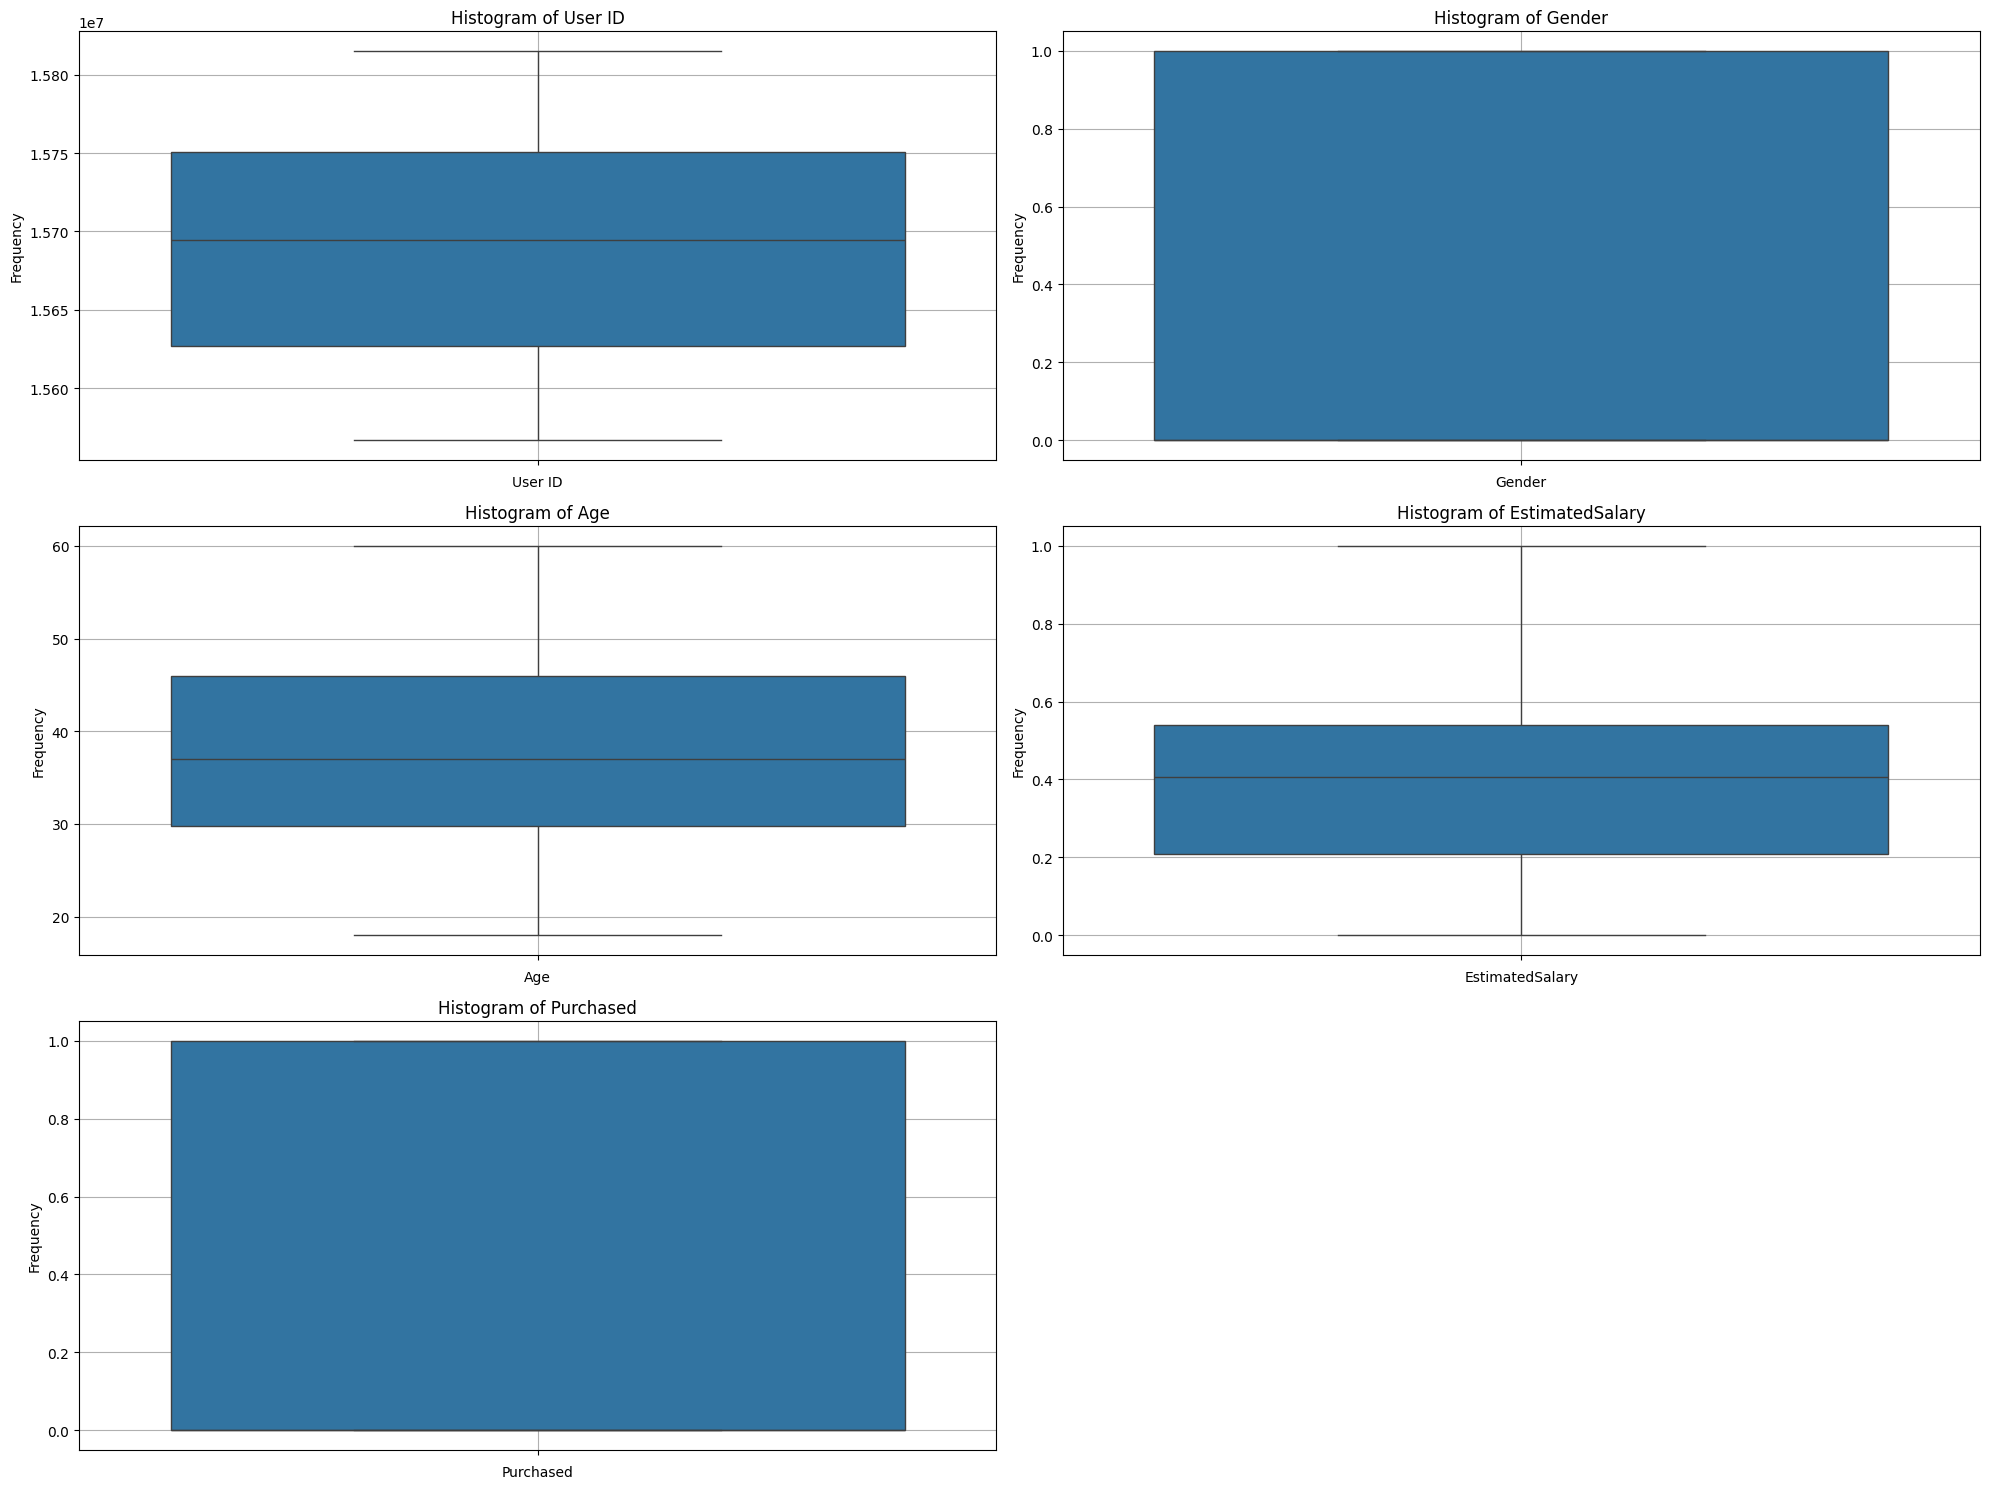

In [49]:
# Set the number of columns for the grid
num_cols = 2 # Change this value according to the number of features you want to display in each row

# Calculate the number of rows needed based on the number of features and the number of columns
num_features = len(data.columns)
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten axes if necessary
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(data.columns):
    sns.boxplot(data[column], ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide empty subplots
for j in range(num_features, num_cols*num_rows):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Skewness Detection

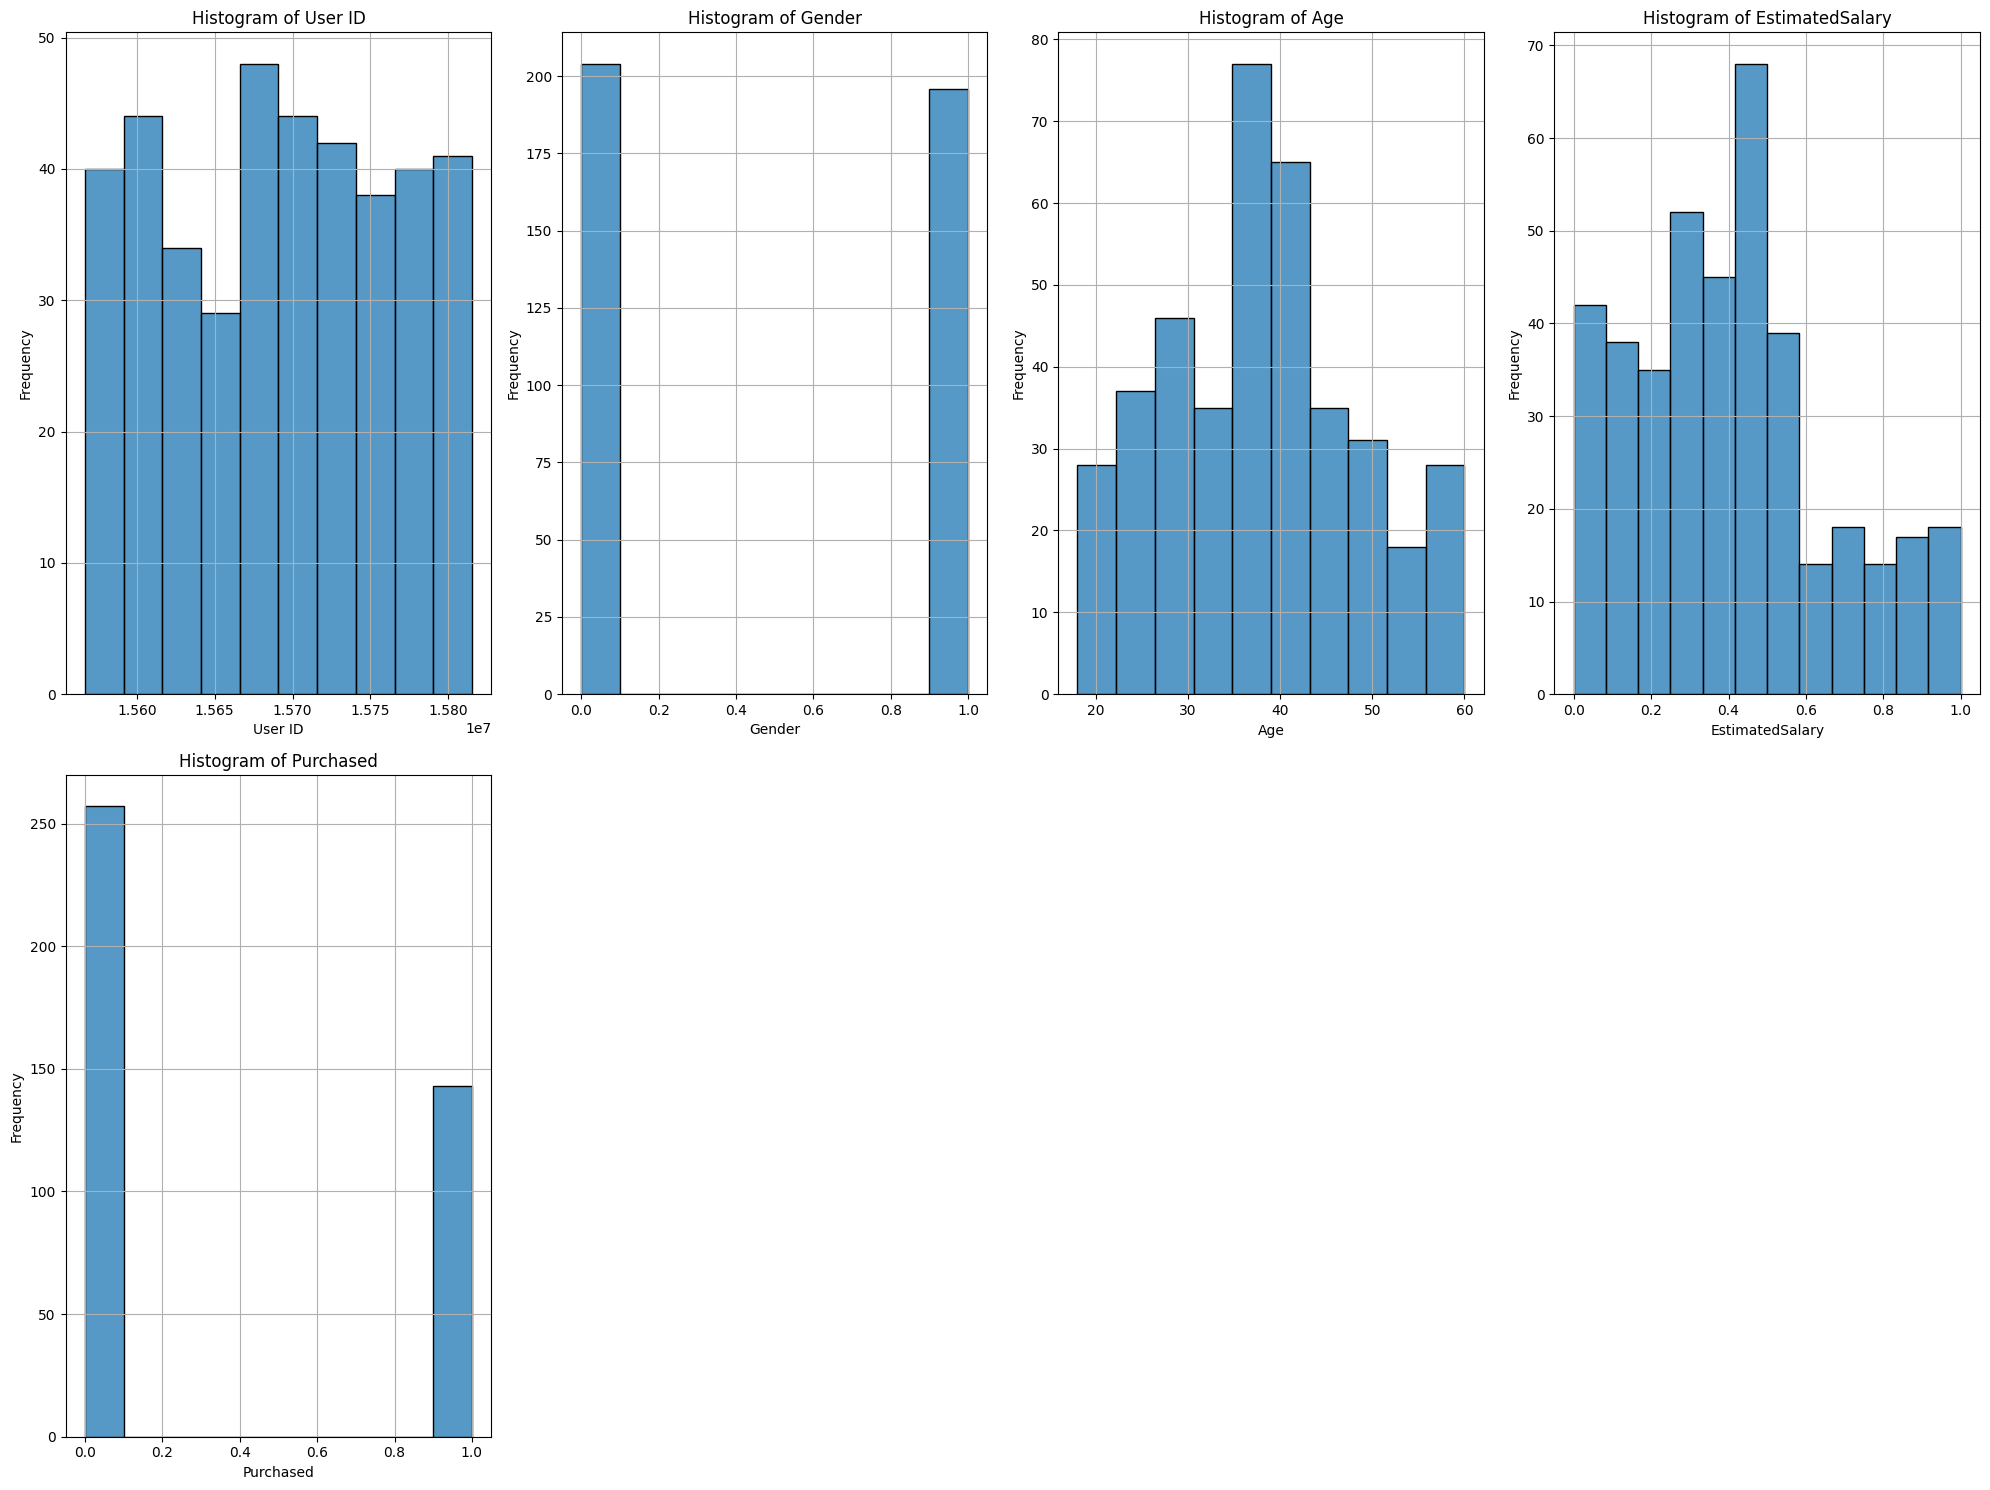

In [50]:
# Set the number of columns for the grid
num_cols = 4  # Change this value according to the number of features you want to display in each row

# Calculate the number of rows needed based on the number of features and the number of columns
num_features = len(data.columns)
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten axes if necessary
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(data.columns):
    sns.histplot(data[column], ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide empty subplots
for j in range(num_features, num_cols*num_rows):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## **Model Creation**

### Splitting training and testing data

In [51]:
features = data.drop(columns=['Purchased', 'User ID'])
labels = data['Purchased']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)

### Initializing the model

In [53]:
model = LogisticRegression()

### Training the Model

In [54]:
model.fit(X_train, y_train)

LogisticRegression()

### Testing the Model

In [58]:
predictions = [model.predict(X_test)]
predictions

[array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])]

## **Performance Metrics**

In [67]:
accuracy = accuracy_score(y_test, predictions[0])
print("Accuracy: ", accuracy)

precision = precision_score(y_test, predictions[0])
print("Precision: ", precision)

f1_score = f1_score(y_test, predictions[0])
print("F1 Score: ", f1_score)

recall = recall_score(y_test, predictions[0])
print("Recall: ", recall)

Accuracy:  0.8875
Precision:  1.0
F1 Score:  0.8524590163934426
Recall:  0.7428571428571429


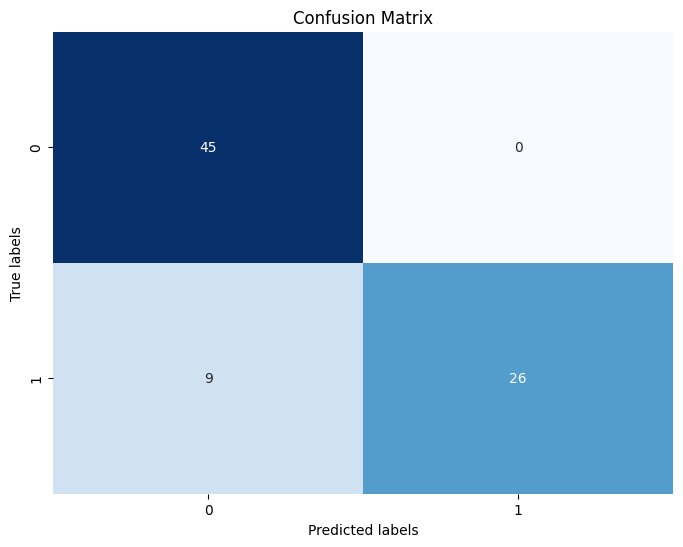

In [70]:
cm = confusion_matrix(y_test, predictions[0])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()